## Importok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

###Fájlok beolvasása

In [4]:
boltok = pd.read_excel("Boltok.xlsx") #Boltok
cikk = pd.read_excel("Cikk.xlsx") #Cikkek
cikkcsop = pd.read_excel("Cikk_cikkcsop.xlsx") #Cikk_cikkcsoportok
cikkcsoportok = pd.read_excel("Cikkcsoportok.xlsx") #Cikkcsoportok
geo = pd.read_excel("Geo adatok.xlsx") #Geomadatok
keszlet = pd.read_excel("keszlet.xlsx") #Keszlet
gyarto = pd.read_excel("Gyartok.xlsx") #Gyartok
forgalom = pd.read_excel("forgalom.xlsx") #Forgalom

#Ismerkedünk a Python-nal, egy-két alap lekérdezés és kiiratás 

### Hány darab bolt van?

In [5]:
len(boltok)

33

In [6]:
boltok

,sek_id,sek_desc,sek_cim
0,10200,Cég 0. Raktár1,5600
1,10300,Cég 0. Raktár2,5600
2,30103,Cég I. Bolt1,5500
3,30104,Cég I. Bolt2,5510
4,30105,Cég I. Bolt3,5516
5,30106,Cég I. Bolt4,5520
6,30108,Cég I. Bolt5,5525
7,30109,Cég I. Bolt6,5525
8,30110,Cég I. Bolt7,5526
9,30111,Cég I. Bolt8,5510


In [7]:
cikk.head(10)

,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000001,Termék 0000001,304205600,DB,50136,A
1,1000002,Termék 0000002,303781200,DB,50136,A
2,1000003,Termék 0000003,1517109000,DB,50260,A
3,1000004,Termék 0000004,403905300,DB,50258,A
4,1000008,Termék 0000005,2202901010,DB,50232,A
5,1000009,Termék 0000006,2202901000,DB,50232,A
6,1000010,Termék 0000007,2202901000,DB,50232,A
7,1000011,Termék 0000008,406,DB,53218,A
8,1000013,Termék 0000009,406,DB,53218,A
9,1000014,Termék 0000010,401301100,DB,53218,A


In [8]:
cikkcsop.head(10)

,ccsop_id4,cik_id
0,3303,1000001
1,3303,1000002
2,3206,1000003
3,3204,1000004
4,219,1000005
5,219,1000006
6,3204,1000007
7,3508,1000008
8,3203,1000009
9,3203,1000010


In [9]:
cikkcsoportok.tail(10)
#len(cikkcsoportok)

,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_id4,ccsop_desc4
299,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8402,"ALSÓRUHÁZAT, FEHÉRNEM?"
300,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8403,"ZOKNI ,HARISNYA"
301,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8406,EGYÉB RUHÁZATI KIEGÉSZÍT?K
302,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,85,"SPORT, JÁTÉK, SZABADIDŐ",8501,"SPORT, JÁTÉK, SZABADIDŐ"
303,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8601,"VIRÁGMAGOK, VIRÁGOK"
304,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8602,VIRÁGFÖLD
305,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8603,KERTÉSZETI CIKKEK
306,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,91,SZOLGÁLTATÁSOK,9101,SZOLGÁLTATÁSOK
307,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9201,TAPADÓ GÖNYGYÖLEG
308,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9202,NEM TAPADÓ GÖNYGYÖLEG


In [10]:
geo[(geo["geo_orszag"] == "Magyarország".decode('utf-8')) &(geo["geo_megye"] == "Bekes megye".decode('utf-8'))]

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
1590,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1591,5501,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1592,5502,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1593,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
1594,5515,NaN,Ecsegfalva,Bekes megye,Dél-Alföld,Magyarország
1595,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
1596,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
1597,5521,NaN,Töltse Ki,Bekes megye,Dél-Alföld,Magyarország
1598,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország
1599,5526,NaN,Kertészsziget,Bekes megye,Dél-Alföld,Magyarország


In [11]:
keszlet[100:200]

,cik,tph,datum,mennyiseg
100,1000503,30302,2016-02-02,41.000
101,1000505,30302,2016-02-02,4.000
102,1000514,30302,2016-02-02,1.000
103,1000518,30302,2016-02-02,-2.000
104,1000523,30302,2016-02-02,-4.000
105,1000530,30302,2016-02-02,1.000
106,1000541,30302,2016-02-02,7.000
107,1000545,30302,2016-02-02,0.000
108,1000547,30302,2016-02-02,2.074
109,1000549,30302,2016-02-02,1.000


##Kerekítés 100-asra

In [12]:
keszlet.mennyiseg = keszlet.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
keszlet.head(20)
#np.round(keszlet.mennyiseg, decimals=-2)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,0
1,1000004,30302,2016-02-02,0
2,1000008,30302,2016-02-02,0
3,1000011,30302,2016-02-02,0
4,1000013,30302,2016-02-02,0
5,1000015,30302,2016-02-02,0
6,1000019,30302,2016-02-02,0
7,1000020,30302,2016-02-02,0
8,1000022,30302,2016-02-02,0
9,1000024,30302,2016-02-02,0


In [14]:
keszlet2 = keszlet
keszlet2 = keszlet2[keszlet2["mennyiseg"] != 0]
keszlet2

,cik,tph,datum,mennyiseg
136,1000642,30302,2016-02-02,-100
230,1001063,30302,2016-02-02,300
231,1001065,30302,2016-02-02,100
332,1001575,30302,2016-02-02,100
384,1001876,30302,2016-02-02,100
447,1002138,30302,2016-02-02,100
452,1002156,30302,2016-02-02,100
453,1002163,30302,2016-02-02,100
476,1002279,30302,2016-02-02,200
477,1002280,30302,2016-02-02,-100


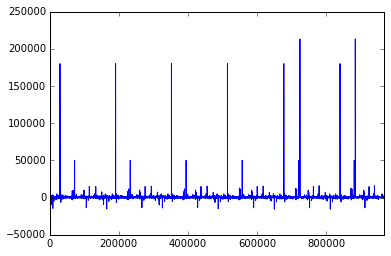

In [17]:
keszlet2.mennyiseg.plot()

In [18]:
keszlet_reszlet = keszlet[(keszlet["tph"] == 30313) & (keszlet["datum"] == "2016-02-02") & (keszlet["cik"] < 1000022)]

In [19]:
keszlet_reszlet
result = pd.merge(keszlet_reszlet, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
result2 = pd.merge(result,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000001,30313,2016-02-02,0,3303,1000001,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000011,30313,2016-02-02,0,3103,1000011,1,Alap cikkcsoport,30,FRISSÁRU,301,SAJT TERMÉKEK,SAJTOK EGALIZÁLT
3,1000013,30313,2016-02-02,0,3103,1000013,1,Alap cikkcsoport,30,FRISSÁRU,301,SAJT TERMÉKEK,SAJTOK EGALIZÁLT
4,1000019,30313,2016-02-02,0,3206,1000019,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","VAJ, MARGARIN"
5,1000003,30313,2016-02-02,0,3206,1000003,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","VAJ, MARGARIN"
6,1000020,30313,2016-02-02,0,3204,1000020,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJFÖL,KEFIR, NATUR JOGHURT"
7,1000021,30313,2016-02-02,0,3204,1000021,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJFÖL,KEFIR, NATUR JOGHURT"
8,1000009,30313,2016-02-02,0,3203,1000009,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJITALOK, KAKAÓK"
9,1000010,30313,2016-02-02,0,3203,1000010,1,Alap cikkcsoport,30,FRISSÁRU,32,"TEJ, TEJTERMÉKEK","TEJITALOK, KAKAÓK"


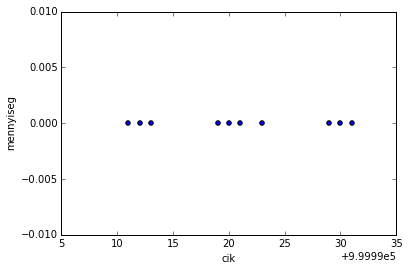

In [20]:
keszlet_reszlet.plot(kind='scatter',x="cik",y="mennyiseg")

#Feladatok

## Vegyük ki a geo adathalmazból a nem magyarországi adatokat!

In [21]:
geo = geo[geo["geo_orszag"] == "Magyarország".decode('utf-8')]
geo

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,0,NaN,Töltse Ki,Nem besorolt,Nem besorolt,Magyarország
3,1000,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
4,1001,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
5,1010,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
6,1011,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
7,1012,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
8,1013,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
9,1014,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
10,1015,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
11,1016,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország


##Nézzük meg, milyen területű készleteink vannak (hol vannak a boltok)!
###(félek hogy csak Békés megyeiek lesznek :( ) - igen


In [22]:
res=pd.merge(boltok, keszlet, left_on='sek_id', right_on='tph', how='inner')         
res2=pd.merge(res, geo, left_on='sek_cim', right_on='geo_id', how='inner')
res2

,sek_id,sek_desc,sek_cim,cik,tph,datum,mennyiseg,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,30103,Cég I. Bolt1,5500,1000002,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1,30103,Cég I. Bolt1,5500,1000004,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,1000008,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30103,Cég I. Bolt1,5500,1000011,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30103,Cég I. Bolt1,5500,1000013,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
5,30103,Cég I. Bolt1,5500,1000019,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
6,30103,Cég I. Bolt1,5500,1000020,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
7,30103,Cég I. Bolt1,5500,1000022,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
8,30103,Cég I. Bolt1,5500,1000024,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
9,30103,Cég I. Bolt1,5500,1000026,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország


In [23]:
set(res2["geo_megye"].tolist())

{u'Bekes megye'}

## Csináljunk egy táblázatot, amelyben megnézzük hogy mely terméket ki gyártotta!

In [24]:
gyarto.head()

,gyarto_id,gyarto_desc
0,50146,Gyártó 1
1,52600,Gyártó 2
2,52612,Gyártó 3
3,53022,Gyártó 4
4,53050,Gyártó 5


In [25]:
result = pd.merge(cikk, cikkcsop, left_on='cik_id', right_on='cik_id', how='inner')
result.drop('cjel_id', axis=1, inplace=True)
result.drop('cik_me_id', axis=1, inplace=True)
result.drop('vtsz_id', axis=1, inplace=True)
result

,cik_id,cik_desc2,cik_gyart,ccsop_id4
0,1000001,Termék 0000001,50136,3303
1,1000002,Termék 0000002,50136,3303
2,1000003,Termék 0000003,50260,3206
3,1000004,Termék 0000004,50258,3204
4,1000008,Termék 0000005,50232,3508
5,1000009,Termék 0000006,50232,3203
6,1000010,Termék 0000007,50232,3203
7,1000011,Termék 0000008,53218,3103
8,1000013,Termék 0000009,53218,3103
9,1000014,Termék 0000010,53218,3211


In [26]:
result2 = pd.merge(result, cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2.drop('ccsop_id4', axis=1, inplace=True)
result2.drop('ccsop_id', axis=1, inplace=True)
result2.drop('ccsop_id2', axis=1, inplace=True)
result2.drop('ccsop_id3', axis=1, inplace=True)
result2

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000319,Termék 0000269,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000584,Termék 0000468,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000586,Termék 0000470,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1001115,Termék 0000872,52490,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1015395,Termék 0010272,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1015397,Termék 0010273,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1015398,Termék 0010274,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [27]:
result3 = pd.merge(result2, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result3.drop('gyarto_id',axis=1, inplace=True)
result3

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


In [28]:
result3["gyarto_desc"].tolist()[0] == "Gyártó 93".decode("utf-8")

True

In [29]:
a = list(set(result3["gyarto_desc"].tolist()))
a[0] == "Gyártó 818".decode("utf-8")

True

## Listázd ki milyen termékeink vannak (ccsop_desc4)! Mindegyik csak egyszer szerepeljen!

In [30]:
csop=list(set(cikkcsoportok["ccsop_desc4"].tolist()))
ccsop4 = pd.DataFrame(csop)
ccsop4.columns = ["Termék"]
ccsop4

,Termék
0,KIS KISZERELÉS?
1,"PEZSG?TABLETTÁK, ITALPOROK"
2,CSIRKE CSOMAGOLT
3,NAPOZÓSZEREK
4,SÓ ZACSKÓS
5,PÁLINKÁK
6,"LEKVÁROK , DZSEMEK"
7,ZÖLDSÉG EGYÉB
8,SERTÉS CSOMAGOLT
9,"IZZÓK, FÉNYCSÖVEK"


#>>>>>>>>>>>>>>>>>Diagram feladatok:<<<<<<<<<<<<<<<<<<<<<<<

## Készítsünk diagramot, hogy egy adott napon, adott boltnak milyen termékből mennyi készlete volt!
### hint: előtte ugye össze kell mergelni a termékeket a készlettel, és akkor a kódsorban megadott feltétel alapján kell megcsinálni az eloszlást :) Remélhetőleg  bplot vagy pyplot vagy seaborn-nel meg tudjuk szépen csinálni, mert először nem akaródzott

In [43]:
elso = keszlet2[(keszlet2["tph"]==30302) & (keszlet2["datum"]=="2016-02-02")]
elso.index = elso["cik"]
len(elso)

406

In [41]:
elso.drop("cik",axis=1, inplace=True)
elso.drop("tph",axis=1, inplace=True)
elso.drop("datum",axis=1, inplace=True)

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()

In [38]:
#elso.drop("datum",axis=1, inplace=True)
#elso = elso[(elso["mennyiseg"]<1) & (elso["mennyiseg"]>-1) & (elso["mennyiseg"]!=0)]
elso = elso[(elso["mennyiseg"]>100)]
elso

,mennyiseg
cik,
1001063,300
1003519,300
1003661,300
1005476,500
1005869,2500
1009546,1600
1009685,300
1009731,400
1011141,300


## A 30302-es telephelyen 200-nál nagyobb mennyiségű készletek diagramja:

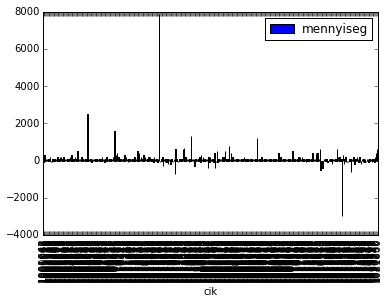

In [42]:
elso.plot(kind='bar')

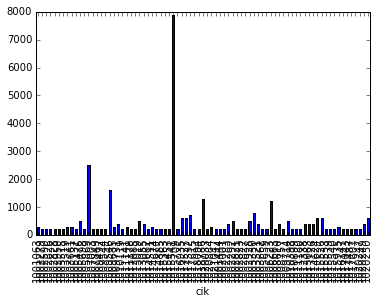

In [47]:
elso = elso[elso["mennyiseg"]>100]
elso.mennyiseg.plot(kind='bar')

## Készítsünk diagramot, hogy egy adott boltnak hogyan változik a készlete az adott egy hét alatt!

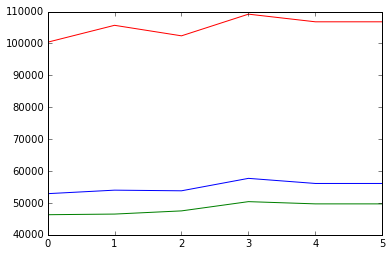

In [56]:
keszlet
masodik = keszlet[(keszlet["tph"]==30302)]
harmadik = keszlet[(keszlet["tph"]==30313)]
negyedik = keszlet[(keszlet["tph"]==30352)]
plt.plot(masodik.groupby(["tph","datum"])["mennyiseg"].sum()) #kék
plt.plot(harmadik.groupby(["tph","datum"])["mennyiseg"].sum()) #zöld
plt.plot(negyedik.groupby(["tph","datum"])["mennyiseg"].sum()) # piros
plt.show()

## Két bolt összehasonlítása

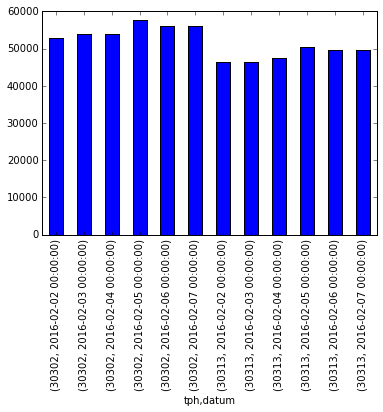

In [29]:
#masodik = masodik.groupby("datum")
#masodik = masodik.groupby(["tph","datum"])
#massum = masodik["mennyiseg"].sum()
masodik.groupby(["tph","datum"])["mennyiseg"].sum().plot(kind='bar')

In [57]:
masodik2 = keszlet.groupby(["tph","datum"])
masodiksum = masodik2["mennyiseg"].sum()
masodiksum

tph    datum     
30103  2016-02-02     70400
       2016-02-03     77300
       2016-02-04     76000
       2016-02-05     73200
       2016-02-06     76400
       2016-02-07     76400
30104  2016-02-02    205700
       2016-02-03    204200
       2016-02-04    197400
       2016-02-05    211300
       2016-02-06    203300
       2016-02-07    203300
30105  2016-02-02     40700
       2016-02-03     38300
       2016-02-04     36300
       2016-02-05     38300
       2016-02-06    240700
       2016-02-07    240700
30106  2016-02-02     14400
       2016-02-03     17500
       2016-02-04     17300
       2016-02-05     16700
       2016-02-06     16900
       2016-02-07     16900
30108  2016-02-02     39600
       2016-02-03     44600
       2016-02-04     42900
       2016-02-05     42300
       2016-02-06     40500
       2016-02-07     40500
                      ...  
30327  2016-02-02     37700
       2016-02-03     36900
       2016-02-04     34500
       2016-02-05     39100
  

## Diagramm: Hány terméket gyártanak az egyes gyártók? +

In [58]:
#import collections
#cikkcnt=collections.Counter(cikk["cik_gyart"])
#cikkcnt.values()
#cikkcnt.keys()
result
result2 = pd.merge(result, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result2.groupby("gyarto_desc").cik_id.nunique()

gyarto_desc
Gyártó 1        1
Gyártó 101      4
Gyártó 102     68
Gyártó 103     13
Gyártó 104      9
Gyártó 106      4
Gyártó 107     30
Gyártó 108     91
Gyártó 111     55
Gyártó 112     67
Gyártó 113     58
Gyártó 116     14
Gyártó 117     50
Gyártó 118      6
Gyártó 119    110
Gyártó 120     84
Gyártó 121      1
Gyártó 122     35
Gyártó 123     21
Gyártó 124     25
Gyártó 125     22
Gyártó 127     21
Gyártó 128      5
Gyártó 129    101
Gyártó 130     84
Gyártó 131     17
Gyártó 132      2
Gyártó 135     19
Gyártó 137     14
Gyártó 138     88
             ... 
Gyártó 791      4
Gyártó 793     15
Gyártó 794      2
Gyártó 795     20
Gyártó 796      5
Gyártó 797     10
Gyártó 799      9
Gyártó 806      1
Gyártó 81      26
Gyártó 816     67
Gyártó 817     76
Gyártó 818     14
Gyártó 833      2
Gyártó 84       5
Gyártó 85      68
Gyártó 852      2
Gyártó 856     56
Gyártó 86       9
Gyártó 865      3
Gyártó 866      2
Gyártó 87      17
Gyártó 876      7
Gyártó 879      1
Gyártó 89      9

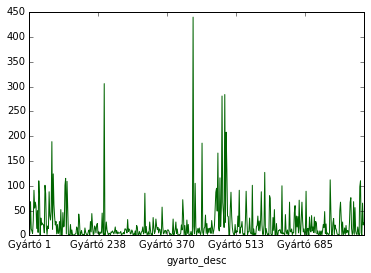

In [59]:
result2.groupby("gyarto_desc").cik_id.nunique().plot(color='DarkGreen')

## Diagramm: Hány gyártó gyárt terméket egy adott boltnak? +

In [60]:
tmp3 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp4=tmp3[tmp3["tph"]==30302]
tmp4
len(set(tmp4["cik_gyart"].tolist()))

344

In [61]:
tmp3.drop("cik",axis=1,inplace=True)
tmp3.drop("datum",axis=1,inplace=True)
tmp3.drop("cik_id",axis=1,inplace=True)
tmp3.drop("cik_desc2",axis=1,inplace=True)
tmp3.drop("vtsz_id",axis=1,inplace=True)
tmp3.drop("cik_me_id",axis=1,inplace=True)
tmp3.drop("cjel_id",axis=1,inplace=True)
tmp3

,tph,mennyiseg,cik_gyart
0,30302,0,50136
1,30313,0,50136
2,30316,0,50136
3,30318,0,50136
4,30319,0,50136
5,30323,0,50136
6,30324,0,50136
7,30325,0,50136
8,30327,0,50136
9,30329,0,50136


In [62]:
tmp3.groupby(["tph","cik_gyart"]).count()

mennyiseg
tph   cik_gyart           
30103 0               4805
      50004            870
      50006             12
      50008            120
      50016              6
      50020              6
      50022            408
      50028            392
      50030              6
      50032             60
      50036            281
      50040            198
      50050            180
      50056              6
      50062            246
      50064            246
      50068              6
      50070            240
      50074            450
      50076             42
      50080             48
      50082            108
      50084             18
      50090            276
      50096            138
      50110             96
      50118            180
      50120             48
      50122             12
      50128            462
...                    ...
30352 53912              6
      53952              6
      53964             18
      54158            120
      54254             12
      54338             60
      54512              6
      54624             78
      54686             12
      54734             42
      54796             48
      54806            254
      54844            141
      54878             90
      54898              6
      54906             78
      54920             78
      54922              6
      54964             12
      55049            290
      55051            174
      55053             54
      55129             72
      55131             12
      55141              6
      55160             24
      55180             18
      55182              6
      55308              4
      90214              6

[9905 rows x 1 columns]

In [63]:
bolt_gyarto=tmp3.groupby(["tph"]).cik_gyart.nunique()
pd.DataFrame(bolt_gyarto)

,cik_gyart
tph,
30103,365
30104,421
30105,340
30106,320
30108,325
30109,307
30110,358
30111,365
30113,320


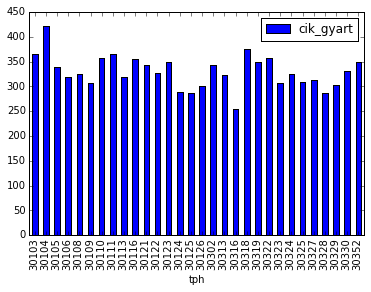

In [64]:
pd.DataFrame(bolt_gyarto).plot(kind='bar')

## -Diagramm: Adott termékcsoport mennyisége egy adott boltban! 

In [65]:
tmp5 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp6 = pd.merge(tmp5, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
tmp7=tmp6[(tmp6["tph"]==30302) & (tmp6["ccsop_id4"]==3303)]
len(tmp7)
tmp6

,cik,tph,datum,mennyiseg,cik_id_x,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id,ccsop_id4,cik_id_y
0,1000002,30302,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
1,1000002,30313,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
2,1000002,30316,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
3,1000002,30318,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
4,1000002,30319,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
5,1000002,30323,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
6,1000002,30324,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
7,1000002,30325,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
8,1000002,30327,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
9,1000002,30329,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002


In [66]:
tmp6.drop("cik_id_x",axis=1,inplace=True)
tmp6.drop("cik_id_y",axis=1,inplace=True)
tmp6.drop("cjel_id",axis=1,inplace=True)
tmp6.drop("cik_me_id",axis=1,inplace=True)
tmp6.drop("vtsz_id",axis=1,inplace=True)
tmp6.drop("cik",axis=1,inplace=True)
tmp6.drop("cik_gyart",axis=1,inplace=True)
tmp6.drop("cik_desc2",axis=1,inplace=True)
tmp6

,tph,datum,mennyiseg,ccsop_id4
0,30302,2016-02-02,0,3303
1,30313,2016-02-02,0,3303
2,30316,2016-02-02,0,3303
3,30318,2016-02-02,0,3303
4,30319,2016-02-02,0,3303
5,30323,2016-02-02,0,3303
6,30324,2016-02-02,0,3303
7,30325,2016-02-02,0,3303
8,30327,2016-02-02,0,3303
9,30329,2016-02-02,0,3303


In [67]:
len(tmp6[(tmp6["ccsop_id4"]==18) & (tmp6["tph"]==30103)])

36

## Egyes boltokban, napi lebontásban mennyi termék volt a ccsop_id4 csoport tagjaiból!

In [68]:
tmp6.groupby(["tph","datum","ccsop_id4"]).sum()

mennyiseg
tph   datum      ccsop_id4           
30103 2016-02-02 0                  0
                 18                 0
                 111                0
                 112             1200
                 114                0
                 115                0
                 122                0
                 124                0
                 141                0
                 142              200
                 143                0
                 144                0
                 145                0
                 152                0
                 154                0
                 161                0
                 162                0
                 163                0
                 164                0
                 166                0
                 210                0
                 211                0
                 212                0
                 213                0
                 214              100
                 215                0
                 216                0
                 217                0
                 218                0
                 219                0
...                               ...
30352 2016-02-07 7303               0
                 7304               0
                 7305               0
                 7306             200
                 7307               0
                 7309             200
                 7312               0
                 7317               0
                 7401             100
                 7402               0
                 7403               0
                 7406               0
                 8101               0
                 8102               0
                 8104               0
                 8108               0
                 8109               0
                 8113               0
                 8203               0
                 8204            3200
                 8205               0
                 8207               0
                 8208             200
                 8212             100
                 8403             100
                 8501               0
                 8601               0
                 9201            2200
                 9202             100
                 9601            2000

[46474 rows x 1 columns]

## Egyes boltokban, hány darab termék volt a ccsop_id4 csoport tagjaiból!

In [69]:
tmp6.groupby(["tph","ccsop_id4"]).mennyiseg.count()

tph    ccsop_id4
30103  0             30
       18            36
       111           30
       112          228
       114           30
       115           30
       122           88
       124            6
       141            6
       142           84
       143           18
       144           30
       145           36
       152           54
       154           10
       161           60
       162           54
       163           12
       164            6
       166           12
       210           36
       211          270
       212          204
       213          204
       214          156
       215           54
       216           66
       217          150
       218          174
       219          156
                   ... 
30352  7303         162
       7304          60
       7305          12
       7306         180
       7307         159
       7309         246
       7312          12
       7317          12
       7401         249
       7402          48

## Diagram: Hány bolt van a városokban? +

In [70]:
#import collections
#cnt=collections.Counter(geo["geo_varos"])
#cnt.values()
#cnt.keys()
boltgeo=pd.merge(boltok, geo, left_on='sek_cim', right_on='geo_id', how='inner')
boltgeo

,sek_id,sek_desc,sek_cim,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,10200,Cég 0. Raktár1,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
1,10300,Cég 0. Raktár2,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30116,Cég I. Bolt10,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30104,Cég I. Bolt2,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
5,30111,Cég I. Bolt8,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
6,30105,Cég I. Bolt3,5516,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
7,30106,Cég I. Bolt4,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
8,30113,Cég I. Bolt9,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
9,30108,Cég I. Bolt5,5525,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország


In [71]:
boltgeo.drop("geo_orszag",axis=1, inplace=True)
boltgeo.drop("geo_regio",axis=1, inplace=True)
boltgeo.drop("geo_megye",axis=1, inplace=True)
boltgeo.drop("geo_kerulet",axis=1, inplace=True)
boltgeo.drop("geo_id",axis=1, inplace=True)
boltgeo.drop("sek_cim",axis=1, inplace=True)
boltgeo.drop("sek_id",axis=1, inplace=True)

In [72]:
valami = boltgeo.groupby("geo_varos")
type(boltgeo["geo_varos"].tolist())

list

In [73]:
from collections import Counter
counts = Counter(boltgeo["geo_varos"].tolist())
print(counts)

Counter({u'B\xe9k\xe9scsaba': 3, u'D\xe9vav\xe1nya': 2, u'Medgyesbodz\xe1s': 2, u'Szeghalom': 2, u'F\xfczesgyarmat': 2, u'Gyomaendr\xf6d': 2, u'Nagyb\xe1nhegyes': 1, u'K\xe9tsoprony': 1, u'Gyula': 1, u'Kert\xe9szsziget': 1, u'Kardos': 1, u'Csan\xe1dap\xe1ca': 1, u'Magyarb\xe1nhegyes': 1, u'Hunya': 1, u'B\xe9k\xe9sszentandr\xe1s': 1, u'Pusztaottlaka': 1, u'Mez\xf6ber\xe9ny': 1, u'\xdajk\xedgy\xf3s': 1, u'Kondoros': 1, u'Kamut': 1, u'\xd6rm\xe9nyk\xfat': 1, u'K\xf6r\xf6slad\xe1ny': 1, u'Telekgerend\xe1s': 1, u'Csabacsud': 1, u'Medgyesegyh\xe1za': 1, u'Murony': 1})


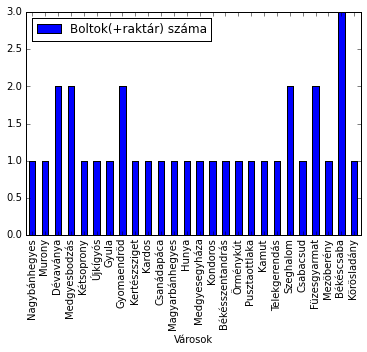

In [74]:
dictionary = dict(counts)
d = pd.DataFrame(dictionary.items())
d
d.columns = ['Városok', 'Boltok(+raktár) száma']
d.index=d["Városok"]
d.plot(kind='bar')

#CLUSTER:
## 2 dimenzió: telephely és a ccsop_id4 tagjai

In [79]:
from sklearn import preprocessing

x = tmp6.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [80]:
df = pd.DataFrame(x_scaled)
df

,0,1,2
0,0.799197,0.067774,0.344027
1,0.843373,0.067774,0.344027
2,0.855422,0.067774,0.344027
3,0.863454,0.067774,0.344027
4,0.867470,0.067774,0.344027
5,0.883534,0.067774,0.344027
6,0.887550,0.067774,0.344027
7,0.891566,0.067774,0.344027
8,0.899598,0.067774,0.344027
9,0.907631,0.067774,0.344027


In [78]:
tmp6.astype(int)

,tph,mennyiseg,ccsop_id4
0,30302,0,3303
1,30313,0,3303
2,30316,0,3303
3,30318,0,3303
4,30319,0,3303
5,30323,0,3303
6,30324,0,3303
7,30325,0,3303
8,30327,0,3303
9,30329,0,3303


In [77]:
tmp6.drop("datum",axis=1, inplace=True)

In [75]:
tmp6

,tph,datum,mennyiseg,ccsop_id4
0,30302,2016-02-02,0,3303
1,30313,2016-02-02,0,3303
2,30316,2016-02-02,0,3303
3,30318,2016-02-02,0,3303
4,30319,2016-02-02,0,3303
5,30323,2016-02-02,0,3303
6,30324,2016-02-02,0,3303
7,30325,2016-02-02,0,3303
8,30327,2016-02-02,0,3303
9,30329,2016-02-02,0,3303


In [61]:
tmp6[tmp6["mennyiseg"]>0]

,tph,datum,mennyiseg,ccsop_id4
629,30318,2016-02-02,100,3206
652,30123,2016-02-02,100,3206
659,30318,2016-02-03,100,3206
682,30123,2016-02-03,100,3206
689,30318,2016-02-04,100,3206
712,30123,2016-02-04,100,3206
719,30318,2016-02-05,100,3206
742,30123,2016-02-05,100,3206
749,30318,2016-02-06,100,3206
772,30123,2016-02-06,100,3206


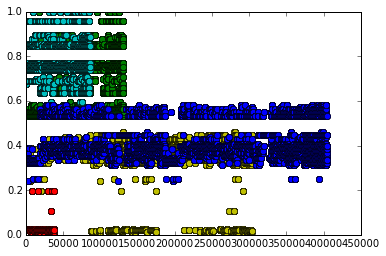

In [84]:
from sklearn.cluster import KMeans
m = KMeans(5)
df["cluster"] = m.fit_predict(df[[0,1,2]].values)
for i in set(df["cluster"]):
    c = df[df["cluster"] == i]
    plt.plot(c[0], c[1], c[2], 'o')
#plt.axis([0, 0, 1, 1]) #<- mettől meddig lássuk
plt.show()

# Innen folytatjuk!

In [49]:
tmp6

,tph,datum,mennyiseg,ccsop_id4,cluster
0,30302,2016-02-02,0,3303,0
1,30313,2016-02-02,0,3303,0
2,30316,2016-02-02,0,3303,0
3,30318,2016-02-02,0,3303,0
4,30319,2016-02-02,0,3303,0
5,30323,2016-02-02,0,3303,0
6,30324,2016-02-02,0,3303,0
7,30325,2016-02-02,0,3303,0
8,30327,2016-02-02,0,3303,0
9,30329,2016-02-02,0,3303,0


#Forgalom-rész!

In [50]:
forgalom

,biz_nr,datum,mozgas,bolt,cikk,mennyiseg
0,SZB/330/000013,2016-02-02,142,30330,1015944,1.000
1,SZB/330/000013,2016-02-02,142,30330,1015958,10.000
2,SZB/330/000013,2016-02-02,142,30330,1015526,20.000
3,SZB/330/000013,2016-02-02,142,30330,1015541,50.000
4,SZB/330/000013,2016-02-02,142,30330,1019964,1.000
5,SZB/330/000013,2016-02-02,142,30330,1015700,3.000
6,SZB/330/000013,2016-02-02,142,30330,1015701,2.000
7,SZB/330/000259,2016-02-02,142,30330,1016782,12.000
8,SZB/318/000658,2016-02-02,142,30318,1016948,8.000
9,SZB/318/000658,2016-02-02,142,30318,1016627,6.000


In [85]:
forgalom.mennyiseg = forgalom.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
forgalom.head(20)

,biz_nr,datum,mozgas,bolt,cikk,mennyiseg
0,SZB/330/000013,2016-02-02,142,30330,1015944,0
1,SZB/330/000013,2016-02-02,142,30330,1015958,0
2,SZB/330/000013,2016-02-02,142,30330,1015526,0
3,SZB/330/000013,2016-02-02,142,30330,1015541,0
4,SZB/330/000013,2016-02-02,142,30330,1019964,0
5,SZB/330/000013,2016-02-02,142,30330,1015700,0
6,SZB/330/000013,2016-02-02,142,30330,1015701,0
7,SZB/330/000259,2016-02-02,142,30330,1016782,0
8,SZB/318/000658,2016-02-02,142,30318,1016948,0
9,SZB/318/000658,2016-02-02,142,30318,1016627,0


In [86]:
forgalom.drop("biz_nr",axis=1,inplace=True)
forgalom.drop("mozgas",axis=1,inplace=True)


##Napi szintre alakítani a forgalom táblát! (össze kell adni az azonos napon, azonos cikkszámú, azonos boltban található termékek mennyiségét)

In [87]:
forgalom2 = pd.DataFrame(forgalom.groupby(["datum","bolt","cikk"]).mennyiseg.sum())
forgalom2

mennyiseg
datum      bolt  cikk              
2016-02-02 10200 1002347        100
                 1002348        100
                 1002955        400
                 1002957        500
                 1002958        500
                 1002962        500
                 1002963        100
                 1002965       1400
                 1002970        400
                 1003253        200
                 1003377        600
                 1003378       2600
                 1003544        400
                 1003567        200
                 1004180       1700
                 1004203        100
                 1004206        100
                 1004209          0
                 1004210          0
                 1004211        100
                 1004212        100
                 1004213        100
                 1004214        100
                 1004822        500
                 1004823        600
                 1004825        300
                 1004826        500
                 1004832        600
                 1005052       -200
                 1005163        100
...                             ...
2016-02-06 30352 1018804          0
                 1018805          0
                 1018807          0
                 1018808          0
                 1018811          0
                 1018812          0
                 1018870          0
                 1018871          0
                 1019635          0
                 1019694          0
                 1019960          0
                 1020208          0
                 1020220          0
                 1020710          0
                 1020732          0
                 1020785          0
                 1020811          0
                 1020884          0
                 1020886          0
                 1020888          0
                 1020917          0
                 1020923          0
                 1021078          0
                 1021086          0
                 1021092          0
                 1021097          0
                 1021117          0
                 1021118          0
                 1021123          0
                 1021136          0

[167030 rows x 1 columns]

## Van-e kiugró adat a forgalom között?

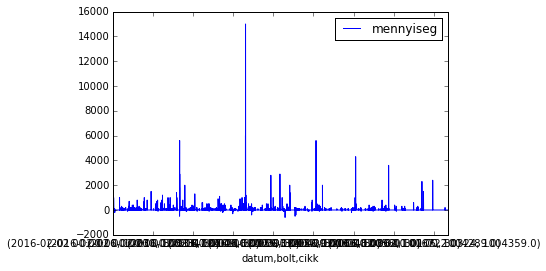

In [88]:
forgalom2.plot()

## Összehasonlítani egy termék forgalmát 2-3 boltra (diagram)!

## Keletkezik-e negatív forgalom? (Ha igen mit jelent, mi az oka?)

# Összehasonlítani a készletet és a forgalmat, van-e változás adott termék, adott boltban, adott időintervallumában a készlet változás és a forgalom között, ha van/ ha nincs megmagyarázni!!!!